# 1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

## 1-1. Iris 데이터셋 구조 확인

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
iris = sns.load_dataset("iris")

In [9]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [11]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## 1-2. 기술통계량 산출

In [14]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [16]:
desc = iris.groupby("species")["petal_length"].describe()
print(desc)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


## 1-3. 시각화

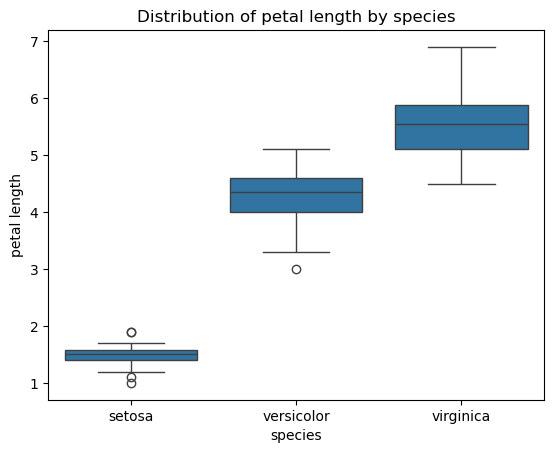

In [19]:
fig = plt.figure()
sns.boxplot(x = "species", y = "petal_length", data = iris)
plt.title("Distribution of petal length by species")
plt.xlabel("species")
plt.ylabel("petal length")
plt.show()

## 1-4. 정규성 검정

In [22]:
from scipy.stats import shapiro

In [24]:
for species in iris["species"].unique():
    data = iris[iris["species"] == species]["petal_length"]
    stat, p = shapiro(data)
    print(f"{species}: p-value = {p:.4f}")

setosa: p-value = 0.0548
versicolor: p-value = 0.1585
virginica: p-value = 0.1098


## 1-5. 등분산성 검정

In [27]:
for s in iris['species'].unique():
    print(f"{s} variance:", iris[iris['species']==s]['petal_length'].var())

setosa variance: 0.030159183673469397
versicolor variance: 0.22081632653061237
virginica variance: 0.304587755102041


In [29]:
from scipy.stats import levene

setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa, versicolor, virginica)
print(f"Levene Test: stat={stat:.4f}, p-value={p:.4f}")

Levene Test: stat=19.4803, p-value=0.0000


## 1-6. 가설 수립

- 본 분석에서는 Species에 따라 Petal Length의 평균에 차이가 있는지를 검정하기 위해 ANOVA를 실행한다.

- 귀무가설 (H0): 3개 Species(setosa, versicolor, virginica) 간의 평균 Petal Length에 차이가 없다.

- 대립가설 (H1): 적어도 한 Species의 평균 Petal Length는 나머지와 다르다.

## 1-7. ANOVA 실행

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
model = ols("petal_length ~ species", data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq     df            F        PR(>F)
species   437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


## 1-8. 사후검정

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [40]:
tukey = pairwise_tukeyhsd(endog=iris["petal_length"], groups=iris["species"], alpha=0.5)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.50   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.7011 2.8949   True
    setosa  virginica     4.09   0.0 3.9931 4.1869   True
versicolor  virginica    1.292   0.0 1.1951 1.3889   True
---------------------------------------------------------


## 1-9. 결과 요약 및 결론

Iris 데이터셋을 바탕으로 Species에 따라 Petal length에 차이가 있는지를 검정하였다.

- Boxplot 시각화 결과, virginica의 Petal Length가 가장 길고, setosa의 Petal Length가 가장 짧은 것으로 나타났다.
- One-way ANOVA 결과, 세 Species 간 평균 Petal Length에 통계적으로 유의미한 차이가 있었다.
- 사후검정(Tukey's HSD)에서도 모든 그룹 쌍 간에 유의미한 차이가 존재함을 확인하였다.

- 결론적으로 세 Species 간의 Petal Length는 통계적으로 유의미하게 다르다고 할 수 있다.
- setosa < versicolor < virginica 순으로 꽃잎 길이가 길다고 할 수 있다.

# 2. 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

## 2-1. 데이터 로드 및 기본 탐색

In [45]:
import pandas as pd
!pip install scikit-learn

In [47]:
df = pd.read_csv("creditcard.csv")

In [49]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
print(df["Class"].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


- 사기거래(Class=1)의 비율이 0.1% 이하로 매우 적음을 확인

## 2-2. 샘플링

In [57]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0].sample(n=10000, random_state=42)

df_sampled = pd.concat([fraud, normal])
print(df_sampled["Class"].value_counts(normalize=True))

Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64


## 2-3. 데이터 전처리

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sampled["Amount_Scaled"] = scaler.fit_transform(df_sampled[["Amount"]])
df_sampled.drop(columns="Amount", inplace=True)

X = df_sampled.drop(columns="Class")
y = df_sampled["Class"]

## 2-4. 학습 데이터와 테스트 데이터 분할

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


## 2-5. SMOTE 적용

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train.value_counts(), y_train_res.value_counts())

Class
0    7999
1     394
Name: count, dtype: int64 Class
0    7999
1    7999
Name: count, dtype: int64


- SMOTE 적용이 필요한 이유: SMOTE는 소수 클래스(사기 거래)의 synthetic 데이터를 생성해 다수 클래스와의 불균형을 완화하여 모델이 소수 클래스(사기 거래)를 더 잘 학습할 수 있게 해준다.

## 2-5. 모델 학습 및 예측

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score, precision_recall_fscore_support

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [69]:
# 출력
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
print(f"Class 0 Recall: {recall[0]:.4f}, F1-score: {f1[0]:.4f}")
print(f"Class 1 Recall: {recall[1]:.4f}, F1-score: {f1[1]:.4f}")

print("\n")
pr_auc = average_precision_score(y_test, y_prob)
print(f"Class 1 PR-AUC: {pr_auc:.4f}")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099



Class 0 Recall: 0.9975, F1-score: 0.9960
Class 1 Recall: 0.8878, F1-score: 0.9158


Class 1 PR-AUC: 0.9537


##  2-7. 최종 성능 평가

- 최종적으로 Random Forest 모델을 사용하여 사기 거래(Class = 1)를 탐지하는 분류기를 학습하였다. SMOTE를 통해 학습 데이터에서 클래스 불균형을 해소한 다음, 모델을 평가하였다.

- 테스트셋에서의 모델 성능은 다음과 같다.
    - Class 1 (사기거래)
        -  Recall: 0.8878
        -  F1-score: 0.9158
        -  PR-AUC: 0.9537

    - Class 0 (정상 거래)
        - Recall: 0.9975
        - F1-score: 0.9960

- 위 결과를 통해 목표로 설정한 세 가지 기준을 모두 충족함을 확인하였다.

- 모델은 실제 사기 거래를 높은 비율로 탐지하면서도 False Positive를 최소화하여 전체적인 분류 성능이 우수하다고 판단된다. 특히 PR-AUC가 0.95 이상으로 나온 점으로 봤을 때, 모델이 불균형 데이터 상황에서도 안정적으로 Precision-Recall trade-off를 처리했음을 보여준다.

- 따라서 본 모델은 실제 금융 사기 거래 탐지 시스템에 적용 가능한 수준의 성능을 보여주었다고 결론지을 수 있다.